In [92]:
import pandas as pd
import sqlite3
import numpy as np

# **Generación Base de datos**

In [93]:
# Generando la conexión con una nueva base de datos
connection = sqlite3.connect('pizza_runner.db')

# Creando el objeto para poder realizar modificaciones
cursor = connection.cursor()

## Generación tabla runners

In [94]:
cursor.execute('''
  CREATE TABLE runners (
    "runner_id" INTEGER,
    "registration_date" DATE )

''')
connection.commit()

### Poblando tabla runners

In [95]:
runners_data = [
    (1, '2021-01-01'),
    (2, '2021-01-03'),
    (3, '2021-01-08'),
    (4, '2021-01-15')
]

cursor.executemany('INSERT INTO runners VALUES (?, ?)', runners_data)
connection.commit()

In [96]:
pd.read_sql_query('SELECT * FROM runners', connection)

,runner_id,registration_date
0,1,2021-01-01
1,2,2021-01-03
2,3,2021-01-08
3,4,2021-01-15


## Creando la tabla customer_orders

In [97]:
cursor.execute('''
  CREATE TABLE customer_orders (
    "order_id" INTEGER,
    "customer_id" INTEGER,
    "pizza_id" INTEGER,
    "exclusions" VARCHAR(4),
    "extras" VARCHAR(4),
    "order_time" TIMESTAMP )
  ''')
connection.commit()

In [98]:

customer_orders_data = [
    ('1', '101', '1', '', '', '2020-01-01 18:05:02'),
    ('2', '101', '1', '', '', '2020-01-01 19:00:52'),
    ('3', '102', '1', '', '', '2020-01-02 23:51:23'),
    ('3', '102', '2', '', np.nan, '2020-01-02 23:51:23'),
    ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
    ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
    ('4', '103', '2', '4', '', '2020-01-04 13:23:46'),
    ('5', '104', '1', 'null', '1', '2020-01-08 21:00:29'),
    ('6', '101', '2', 'null', 'null', '2020-01-08 21:03:13'),
    ('7', '105', '2', 'null', '1', '2020-01-08 21:20:29'),
    ('8', '102', '1', 'null', 'null', '2020-01-09 23:54:33'),
    ('9', '103', '1', '4', '1, 5', '2020-01-10 11:22:59'),
    ('10', '104', '1', 'null', 'null', '2020-01-11 18:34:49'),
    ('10', '104', '1', '2, 6', '1, 4', '2020-01-11 18:34:49')
  ]


cursor.executemany('INSERT INTO customer_orders VALUES (?, ?, ?,?,?,?)', customer_orders_data)
connection.commit()

In [99]:
pd.read_sql_query('SELECT * FROM customer_orders', connection)

,order_id,customer_id,pizza_id,exclusions,extras,order_time
0,1,101,1,,,2020-01-01 18:05:02
1,2,101,1,,,2020-01-01 19:00:52
2,3,102,1,,,2020-01-02 23:51:23
3,3,102,2,,None,2020-01-02 23:51:23
4,4,103,1,4,,2020-01-04 13:23:46
5,4,103,1,4,,2020-01-04 13:23:46
6,4,103,2,4,,2020-01-04 13:23:46
7,5,104,1,null,1,2020-01-08 21:00:29
8,6,101,2,null,null,2020-01-08 21:03:13
9,7,105,2,null,1,2020-01-08 21:20:29


## Creando la tabla runner_orders

In [100]:
cursor.execute('''
  CREATE TABLE runner_orders (
    "order_id" INTEGER,
    "runner_id" INTEGER,
    "pickup_time" VARCHAR(19),
    "distance" VARCHAR(7),
    "duration" VARCHAR(10),
    "cancellation" VARCHAR(23)
  )
''')
connection.commit()


In [101]:
runners_orders_data = [
  ('1', '1', '2020-01-01 18:15:34', '20km', '32 minutes', ''),
  ('2', '1', '2020-01-01 19:10:54', '20km', '27 minutes', ''),
  ('3', '1', '2020-01-03 00:12:37', '13.4km', '20 mins', np.nan),
  ('4', '2', '2020-01-04 13:53:03', '23.4', '40',  np.nan),
  ('5', '3', '2020-01-08 21:10:57', '10', '15',  np.nan),
  ('6', '3', 'null', 'null', 'null', 'Restaurant Cancellation'),
  ('7', '2', '2020-01-08 21:30:45', '25km', '25mins', 'null'),
  ('8', '2', '2020-01-10 00:15:02', '23.4 km', '15 minute', 'null'),
  ('9', '2', 'null', 'null', 'null', 'Customer Cancellation'),
  ('10', '1', '2020-01-11 18:50:20', '10km', '10minutes', 'null')
 ]

cursor.executemany('INSERT INTO runner_orders  VALUES (?, ?, ?, ?, ?, ?)', runners_orders_data)
connection.commit()

In [102]:
pd.read_sql_query('SELECT * FROM runner_orders', connection)

,order_id,runner_id,pickup_time,distance,duration,cancellation
0,1,1,2020-01-01 18:15:34,20km,32 minutes,
1,2,1,2020-01-01 19:10:54,20km,27 minutes,
2,3,1,2020-01-03 00:12:37,13.4km,20 mins,None
3,4,2,2020-01-04 13:53:03,23.4,40,None
4,5,3,2020-01-08 21:10:57,10,15,None
5,6,3,null,null,null,Restaurant Cancellation
6,7,2,2020-01-08 21:30:45,25km,25mins,null
7,8,2,2020-01-10 00:15:02,23.4 km,15 minute,null
8,9,2,null,null,null,Customer Cancellation
9,10,1,2020-01-11 18:50:20,10km,10minutes,null


## Creando tabla pizza_names

In [103]:
cursor.execute('''
  CREATE TABLE pizza_names (
    "pizza_id" INTEGER,
    "pizza_name" TEXT
  )
''')
connection.commit()

In [104]:
cursor.execute('INSERT INTO pizza_names VALUES (1, "Meatlovers"), (2, "Vegetarian")')
connection.commit()

In [105]:
pd.read_sql_query('SELECT * FROM pizza_names', connection)

,pizza_id,pizza_name
0,1,Meatlovers
1,2,Vegetarian


## Creando tabla pizza_recipes

In [106]:
cursor.execute('''
  CREATE TABLE pizza_recipes (
    "pizza_id" INTEGER,
    "toppings" TEXT
  )

''')

connection.commit()

In [107]:
cursor.execute("INSERT INTO pizza_recipes VALUES (1, '1, 2, 3, 4, 5, 6, 8, 10'), (2, '4, 6, 7, 9, 11, 12')")
connection.commit()

In [108]:
pd.read_sql_query('SELECT * FROM pizza_recipes', connection)


,pizza_id,toppings
0,1,"1, 2, 3, 4, 5, 6, 8, 10"
1,2,"4, 6, 7, 9, 11, 12"


## Creando tabla pizza_toppings


In [109]:
cursor.execute('''
  CREATE TABLE pizza_toppings (
    "topping_id" INTEGER,
    "topping_name" TEXT
  )
''')
connection.commit()


In [110]:
pizza_toppings_data = [

  (1, 'Bacon'),
  (2, 'BBQ Sauce'),
  (3, 'Beef'),
  (4, 'Cheese'),
  (5, 'Chicken'),
  (6, 'Mushrooms'),
  (7, 'Onions'),
  (8, 'Pepperoni'),
  (9, 'Peppers'),
  (10, 'Salami'),
  (11, 'Tomatoes'),
  (12, 'Tomato Sauce')
]

cursor.executemany('INSERT INTO pizza_toppings VALUES (?, ? )', pizza_toppings_data)

connection.commit()

In [111]:
pd.read_sql_query('SELECT * FROM pizza_toppings', connection)

,topping_id,topping_name
0,1,Bacon
1,2,BBQ Sauce
2,3,Beef
3,4,Cheese
4,5,Chicken
5,6,Mushrooms
6,7,Onions
7,8,Pepperoni
8,9,Peppers
9,10,Salami


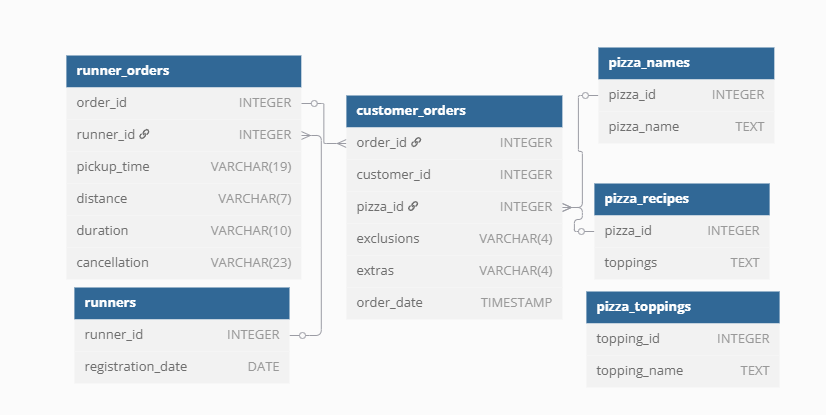



---



# **EXPLORAR, TRANSFORMAR Y CARGAR**

## Revisando tabla customer_orders


Para `order_id`, `customer_id`, `pizza_id` y `order_time` no se necesita realizar ninguna modificación.

`exclusions` y `extras`: En estas columnas hay valores nulos y valores 'nulos' como strings por lo que es necesario reemplazarlos



In [118]:
query = '''

  SELECT
    order_id,
    customer_id,
    pizza_id,
    CASE
      WHEN exclusions IS NULL OR exclusions = 'null' THEN ''
      ELSE exclusions
    END AS exclusions,
    CASE
      WHEN extras IS NULL OR extras = 'null' THEN ''
      ELSE extras
    END AS extras,
    order_time
  FROM
    customer_orders

'''

pd.read_sql_query(query, connection)


,order_id,customer_id,pizza_id,exclusions,extras,order_time
0,1,101,1,,,2020-01-01 18:05:02
1,2,101,1,,,2020-01-01 19:00:52
2,3,102,1,,,2020-01-02 23:51:23
3,3,102,2,,,2020-01-02 23:51:23
4,4,103,1,4,,2020-01-04 13:23:46
5,4,103,1,4,,2020-01-04 13:23:46
6,4,103,2,4,,2020-01-04 13:23:46
7,5,104,1,,1,2020-01-08 21:00:29
8,6,101,2,,,2020-01-08 21:03:13
9,7,105,2,,1,2020-01-08 21:20:29


## Actualizando la tabla

In [119]:
update_query = """
UPDATE customer_orders
SET
  exclusions = CASE
    WHEN exclusions IS NULL OR exclusions = 'null' THEN ''
    ELSE exclusions
  END,
  extras = CASE
    WHEN extras IS NULL OR extras = 'null' THEN ''
    ELSE extras
  END;
"""

# Ejecutar la sentencia UPDATE
cursor.execute(update_query)

# Guardar los cambios en la base de datos
connection.commit()

In [121]:
pd.read_sql_query('SELECT * FROM customer_orders', connection)

,order_id,customer_id,pizza_id,exclusions,extras,order_time
0,1,101,1,,,2020-01-01 18:05:02
1,2,101,1,,,2020-01-01 19:00:52
2,3,102,1,,,2020-01-02 23:51:23
3,3,102,2,,,2020-01-02 23:51:23
4,4,103,1,4,,2020-01-04 13:23:46
5,4,103,1,4,,2020-01-04 13:23:46
6,4,103,2,4,,2020-01-04 13:23:46
7,5,104,1,,1,2020-01-08 21:00:29
8,6,101,2,,,2020-01-08 21:03:13
9,7,105,2,,1,2020-01-08 21:20:29


## Revisando runner_orders

In [123]:
query = '''

  SELECT
      *
  FROM
    runner_orders

'''

pd.read_sql_query(query, connection)

,order_id,runner_id,pickup_time,distance,duration,cancellation
0,1,1,2020-01-01 18:15:34,20km,32 minutes,
1,2,1,2020-01-01 19:10:54,20km,27 minutes,
2,3,1,2020-01-03 00:12:37,13.4km,20 mins,None
3,4,2,2020-01-04 13:53:03,23.4,40,None
4,5,3,2020-01-08 21:10:57,10,15,None
5,6,3,null,null,null,Restaurant Cancellation
6,7,2,2020-01-08 21:30:45,25km,25mins,null
7,8,2,2020-01-10 00:15:02,23.4 km,15 minute,null
8,9,2,null,null,null,Customer Cancellation
9,10,1,2020-01-11 18:50:20,10km,10minutes,null


`pickup_time`: Posee valores nulos

`distancia`: Tiene valores nuelos además de km, la que vamos a sacar

`duration`: Necesitamos sacar los nulos, las palabras que hacen referencia a minutos

`cancellation`: En esta columna sacaremos los

## Generando el Query corrector

In [129]:
query = '''
  SELECT
    order_id,
    runner_id,
    CASE
      WHEN pickup_time IS NULL OR pickup_time = 'null' THEN ''
      ELSE pickup_time
    END AS pickup_time,
    TRIM(CASE
      WHEN distance IS NULL OR distance = 'null' THEN ''
      ELSE distance
    END, 'km') AS distance,
    CASE
      WHEN duration IS NULL OR duration = 'null' THEN ''
      WHEN duration LIKE '%mins' THEN REPLACE(duration, 'mins', '')
      WHEN duration LIKE '%minute' THEN REPLACE(duration, 'minute', '')
      WHEN duration LIKE '%minutes' THEN REPLACE(duration, 'minutes', '')
      ELSE duration
    END AS duration,
    CASE
      WHEN cancellation IS NULL OR cancellation = 'null' THEN ''
      ELSE cancellation
    END AS cancellation
  FROM
    runner_orders
'''

pd.read_sql_query(query, connection)

,order_id,runner_id,pickup_time,distance,duration,cancellation
0,1,1,2020-01-01 18:15:34,20,32,
1,2,1,2020-01-01 19:10:54,20,27,
2,3,1,2020-01-03 00:12:37,13.4,20,
3,4,2,2020-01-04 13:53:03,23.4,40,
4,5,3,2020-01-08 21:10:57,10,15,
5,6,3,,,,Restaurant Cancellation
6,7,2,2020-01-08 21:30:45,25,25,
7,8,2,2020-01-10 00:15:02,23.4,15,
8,9,2,,,,Customer Cancellation
9,10,1,2020-01-11 18:50:20,10,10,


## Update la tabla

In [130]:
update_query = """
UPDATE runner_orders
SET
  pickup_time = CASE
    WHEN pickup_time IS NULL OR pickup_time = 'null' THEN ''
    ELSE pickup_time
  END,
  distance = TRIM(CASE
    WHEN distance IS NULL OR distance = 'null' THEN ''
    ELSE distance
  END, 'km'),
  duration = CASE
    WHEN duration IS NULL OR duration = 'null' THEN ''
    WHEN duration LIKE '%mins' THEN REPLACE(duration, 'mins', '')
    WHEN duration LIKE '%minute' THEN REPLACE(duration, 'minute', '')
    WHEN duration LIKE '%minutes' THEN REPLACE
    (duration, 'minutes', '')
    ELSE duration
  END,
  cancellation = CASE
    WHEN cancellation IS NULL OR cancellation = 'null' THEN ''
    ELSE cancellation
  END;
"""

# Ejecutar la sentencia UPDATE
cursor.execute(update_query)

# Guardar los cambios en la base de datos
connection.commit()



---



# **PREGUNTAS**

## Generando dataframes para respuestas en pandas

In [180]:
df_customer_orders = pd.read_sql_query('''SELECT * FROM customer_orders''', connection)
df_pizza_names = pd.read_sql_query('''SELECT * FROM pizza_names''', connection)
df_runner_orders = pd.read_sql_query('''SELECT * FROM runner_orders''', connection)
df_pizza_recipes = pd.read_sql_query('''SELECT * FROM pizza_recipes''', connection)
df_pizza_toppings = pd.read_sql_query('''SELECT * FROM pizza_toppings''', connection)

**1. Cúantas pizzas fueron ordenadas ?**

### RESPUESTA **SQL**

In [131]:
query = '''
  SELECT
    COUNT(*) AS total_pizas_ordenadas
   FROM
      customer_orders


'''

pd.read_sql_query(query, connection)

,total_pizas_ordenadas
0,14


### Respuesta **Pandas**

In [181]:
print(f'Total de pizzas ordenadas {df_customer_orders["order_id"].size}')

Total de pizzas ordenadas 14


**2. Cúantas ordenes unicas por cliente fueron realizadas?**


### Respuesta **SQL**

In [132]:
query = '''
  SELECT
    COUNT(DISTINCT order_id) AS total_pizas_ordenadas
   FROM
      customer_orders


'''

pd.read_sql_query(query, connection)

,total_pizas_ordenadas
0,10


### Respuesta **Pandas**

In [182]:
print(f'El total de ordenes unicas de los clientes fue {df_customer_orders["order_id"].nunique()}')

El total de ordenes unicas de los clientes fue 10


**3. Cuantas ordenes exitosas fueron entregadas por cada repartidor?**


### Respuesta **SQL**

In [173]:
query = '''

  SELECT
    runner_id,
    COUNT(order_id) AS total_pizas_repartidas
   FROM
    runner_orders
  WHERE CAST(distance AS INTEGER) !=0
  GROUP BY
    runner_id



'''
pd.read_sql_query(query, connection)


,runner_id,total_pizas_repartidas
0,1,4
1,2,3
2,3,1


### Respuesta **Pandas**

In [165]:
df = pd.read_sql_query('''SELECT * FROM runner_orders''', connection)
df

,order_id,runner_id,pickup_time,distance,duration,cancellation
0,1,1,2020-01-01 18:15:34,20,32,
1,2,1,2020-01-01 19:10:54,20,27,
2,3,1,2020-01-03 00:12:37,13.4,20,
3,4,2,2020-01-04 13:53:03,23.4,40,
4,5,3,2020-01-08 21:10:57,10,15,
5,6,3,,,,Restaurant Cancellation
6,7,2,2020-01-08 21:30:45,25,25,
7,8,2,2020-01-10 00:15:02,23.4,15,
8,9,2,,,,Customer Cancellation
9,10,1,2020-01-11 18:50:20,10,10,


In [183]:
df_filtrado = df_runner_orders[(df_runner_orders['distance']!=0) & (df_runner_orders['distance']!='')]

df_filtrado.groupby('runner_id')[['order_id']].count().rename(columns={'order_id':'total_pizas_repartidas'})

,total_pizas_repartidas
runner_id,
1,4
2,3
3,1


## **4. Cuantos pizas de cada tipo fueron entregadas?**





### Respuesta **SQL**

In [150]:
query = '''

  SELECT
    pizza_name,
    COUNT(c.order_id) AS total_pizas_ordenadas
   FROM
    customer_orders c
  INNER JOIN
    runner_orders r
      ON
        c.order_id = r.order_id
  INNER JOIN
    pizza_names p
    ON
      c.pizza_id = p.pizza_id
  WHERE
    CAST(distance AS INTEGER) !=0
  GROUP BY
    pizza_name

'''
pd.read_sql_query(query, connection)




,pizza_name,total_pizas_ordenadas
0,Meatlovers,9
1,Vegetarian,3


### Respuesta **Pandas**

In [191]:
df_merge = pd.merge(df_customer_orders, df_runner_orders, on='order_id')
df_merge = pd.merge(df_merge, df_pizza_names, on='pizza_id')
df_merge = df_merge[(df_merge['distance']!=0) & (df_merge['distance']!='')]
df_merge

,order_id,customer_id,pizza_id,exclusions,extras,order_time,runner_id,pickup_time,distance,duration,cancellation,pizza_name
0,1,101,1,,,2020-01-01 18:05:02,1,2020-01-01 18:15:34,20,32,,Meatlovers
1,2,101,1,,,2020-01-01 19:00:52,1,2020-01-01 19:10:54,20,27,,Meatlovers
2,3,102,1,,,2020-01-02 23:51:23,1,2020-01-03 00:12:37,13.4,20,,Meatlovers
3,3,102,2,,,2020-01-02 23:51:23,1,2020-01-03 00:12:37,13.4,20,,Vegetarian
4,4,103,1,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Meatlovers
5,4,103,1,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Meatlovers
6,4,103,2,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Vegetarian
7,5,104,1,,1,2020-01-08 21:00:29,3,2020-01-08 21:10:57,10,15,,Meatlovers
9,7,105,2,,1,2020-01-08 21:20:29,2,2020-01-08 21:30:45,25,25,,Vegetarian
10,8,102,1,,,2020-01-09 23:54:33,2,2020-01-10 00:15:02,23.4,15,,Meatlovers


In [192]:
df_merge.groupby(['pizza_name'])['order_id'].count().rename('total_pizas_ordenadas')

,total_pizas_ordenadas
pizza_name,
Meatlovers,9
Vegetarian,3


**5. Cuantas pizzas vegetarianas y meatlovers fueron ordenadas por cada cliente?**


### Respuesta **SQL**

In [195]:
query = '''

  SELECT
    c.customer_id,
    pizza_name,
    COUNT(c.order_id) AS total_pizas_ordenadas
   FROM
    customer_orders c
  INNER JOIN
    runner_orders r
      ON
        c.order_id = r.order_id
  INNER JOIN
    pizza_names p
    ON
      c.pizza_id = p.pizza_id

  GROUP BY
    c.customer_id, pizza_name

'''
pd.read_sql_query(query, connection)


,customer_id,pizza_name,total_pizas_ordenadas
0,101,Meatlovers,2
1,101,Vegetarian,1
2,102,Meatlovers,2
3,102,Vegetarian,1
4,103,Meatlovers,3
5,103,Vegetarian,1
6,104,Meatlovers,3
7,105,Vegetarian,1


### Respuesta **Pandas**

In [197]:
df_merge = pd.merge(df_customer_orders, df_runner_orders, on='order_id')
df_merge = pd.merge(df_merge, df_pizza_names, on='pizza_id')
df_merge

,order_id,customer_id,pizza_id,exclusions,extras,order_time,runner_id,pickup_time,distance,duration,cancellation,pizza_name
0,1,101,1,,,2020-01-01 18:05:02,1,2020-01-01 18:15:34,20,32,,Meatlovers
1,2,101,1,,,2020-01-01 19:00:52,1,2020-01-01 19:10:54,20,27,,Meatlovers
2,3,102,1,,,2020-01-02 23:51:23,1,2020-01-03 00:12:37,13.4,20,,Meatlovers
3,3,102,2,,,2020-01-02 23:51:23,1,2020-01-03 00:12:37,13.4,20,,Vegetarian
4,4,103,1,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Meatlovers
5,4,103,1,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Meatlovers
6,4,103,2,4,,2020-01-04 13:23:46,2,2020-01-04 13:53:03,23.4,40,,Vegetarian
7,5,104,1,,1,2020-01-08 21:00:29,3,2020-01-08 21:10:57,10,15,,Meatlovers
8,6,101,2,,,2020-01-08 21:03:13,3,,,,Restaurant Cancellation,Vegetarian
9,7,105,2,,1,2020-01-08 21:20:29,2,2020-01-08 21:30:45,25,25,,Vegetarian


In [198]:
df_merge.groupby(['customer_id', 'pizza_name'])['order_id'].count().rename('total_pizas_ordenadas')

customer_id  pizza_name
101          Meatlovers    2
             Vegetarian    1
102          Meatlovers    2
             Vegetarian    1
103          Meatlovers    3
             Vegetarian    1
104          Meatlovers    3
105          Vegetarian    1
Name: total_pizas_ordenadas, dtype: int64